In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
#Use grep to select the rows from larger dataset that have the procedure code(CPT4) for a caesarian section to limit the dataset to one specific procedure
caesarian_df = pd.read_csv('caesarian_data.csv', index_col=[0])
caesarian_df

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,1,22,NaN,G0202,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159510,2,22,NaN,77052,26,,,,2016-02-03,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016


In [52]:
list(caesarian_df.columns.values)

['Claim_Line_No',
 'Place_of_Service_Cd',
 'Rev_Cd',
 'CPT4_ID',
 'CPT4_Mod1_Cd',
 'CPT4_Mod2_Cd',
 'CPT4_Mod3_Cd',
 'CPT4_Mod4_Cd',
 'Service_Start_Dt',
 'Units',
 'Charge_Amt',
 'Prepaid_Amt',
 'Plan_Paid_Amt',
 'NDC_Cd',
 'Capitation_Flag',
 'ER_Flag',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Deductible_Amt',
 'Dental_Flag',
 'Unit_Of_Measure_Cd',
 'Unit_Of_Measure_Desc',
 'Service_Start_Year']

In [4]:
caesarian_df.CPT4_Mod1_Cd.unique()

array(['  ', 'UC', '26', '22', 'CC', 'RR', '25', '59', '80', 'SL', 'TC',
       'Q5', '81', 'PO', 'UD', 'GP', 'GO', 'GY', 'U6', '52', 'CG', 'AT',
       '51', 'LT', 'P1', 'UB', 'T5', 'XE', 'TE', 'RT', 'RA', 'AG', 'AS',
       'F4', '8P', '90', 'QW', 'NU', 'KX', 'XU', 'GZ', 'U8', 'AA', 'GC'],
      dtype=object)

In [14]:
caesarian_df.groupby('CPT4_Mod1_Cd').size()

CPT4_Mod1_Cd
      6632
22     164
25      46
26      25
51       1
52       6
59      22
80       2
81       1
8P       1
90       5
AA       1
AG       1
AS       1
AT       2
CC      15
CG       2
F4       1
GC      10
GO       4
GP      16
GY       9
GZ       2
KX       1
LT       9
NU       7
P1       1
PO       8
Q5       4
QW      11
RA       1
RR      10
RT      10
SL      32
T5       1
TC       8
TE       6
U6       2
U8       2
UB       3
UC     544
UD      13
XE       1
XU       2
dtype: int64

In [15]:
caesarian_df.groupby('CPT4_Mod2_Cd').size()

CPT4_Mod2_Cd
      7594
22       1
CC      15
CI       6
GY       2
KI       1
KX       4
LT       4
PO       2
RT       1
TC       3
UC      12
dtype: int64

In [6]:
caesarian_df.CPT4_Mod2_Cd.unique()

array(['  ', 'UC', 'RT', 'PO', 'KX', 'CC', 'CI', 'GY', 'LT', 'TC', 'KI',
       '22'], dtype=object)

In [7]:
caesarian_df.CPT4_Mod3_Cd.unique()

array(['  '], dtype=object)

In [8]:
caesarian_df.CPT4_Mod4_Cd.unique()

array(['  '], dtype=object)

In [5]:
#create new dataframe without claims that have '59510' in their claim number which aren't the right procedure  
caesarian_df2 = caesarian_df[caesarian_df['CPT4_ID'] == ('59510')]
caesarian_df2

,Claim_Line_No,Place_of_Service_Cd,Rev_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Units,...,NDC_Cd,Capitation_Flag,ER_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Dental_Flag,Unit_Of_Measure_Cd,Unit_Of_Measure_Desc,Service_Start_Year
Claim_ID,,,,,,,,,,,,,,,,,,,,,
340993570,1,21,NaN,59510,,,,,2016-07-29,1,...,0,N,N,0.0,715.54,715.54,N,UN,Units,2016
350588632,1,21,NaN,59510,,,,,2016-06-27,1,...,0,N,N,0.0,641.99,0.00,N,UN,Units,2016
357047267,1,21,NaN,59510,UC,,,,2016-10-17,1,...,0,Y,N,0.0,0.00,0.00,N,UN,Units,2016
340423363,1,21,NaN,59510,,,,,2016-02-21,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171159994,1,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,295.52,0.00,N,UN,Units,2016
171159994,2,21,NaN,59510,,,,,2016-02-05,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171175684,1,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,277.24,0.00,N,UN,Units,2016
171175684,2,21,NaN,59510,,,,,2016-01-31,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016
171157745,1,99,NaN,59510,,,,,2016-02-08,1,...,0,N,N,0.0,0.00,0.00,N,UN,Units,2016


In [22]:
#Remove Columns that are redundant (i.e. descriptive of another column in the table) or contain only one value
edited_caesarian_df = caesarian_df2.drop(['Dental_Flag', 'Units', 'Rev_Cd', 'NDC_Cd', 'ER_Flag', 'Service_Start_Year', 'Unit_Of_Measure_Desc', 'Unit_Of_Measure_Cd'], axis=1)
edited_caesarian_df

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,CPT4_Mod1_Cd,CPT4_Mod2_Cd,CPT4_Mod3_Cd,CPT4_Mod4_Cd,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,,,,,
340993570,1,21,59510,,,,,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,1,21,59510,,,,,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,1,21,59510,UC,,,,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,1,21,59510,,,,,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,1,21,59510,,,,,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,2,21,59510,,,,,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,1,21,59510,,,,,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,2,21,59510,,,,,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,1,99,59510,,,,,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


In [57]:
#There are very few rows (<30 out of a DataFrame with 6200+ rows) with CPT4 modifications. For the first model, drop them to simplify the process
simplified_CPT4_df = edited_caesarian_df.drop(['CPT4_Mod1_Cd', 'CPT4_Mod2_Cd', 'CPT4_Mod3_Cd', 'CPT4_Mod4_Cd'], axis=1)
simplified_CPT4_df


,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt
Claim_ID,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,715.54,715.54
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,641.99,0.00
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0.00,0.00
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0.00,0.00
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,295.52,0.00
171159994,2,21,59510,2016-02-05,1160.97,0.00,1160.97,N,0.0,0.00,0.00
171175684,1,21,59510,2016-01-31,2710.84,0.00,1108.96,N,0.0,277.24,0.00
171175684,2,21,59510,2016-01-31,1089.16,0.00,1089.16,N,0.0,0.00,0.00
171157745,1,99,59510,2016-02-08,3850.00,0.00,2638.56,N,0.0,0.00,0.00


## Filter Claims Header file


In [62]:
claims_of_interest = set(simplified_CPT4_df.index.astype(str))
claims_of_interest

{'331567431',
 '248211173',
 '160717834',
 '140471091',
 '340525941',
 '141554333',
 '171374966',
 '278000588',
 '320541971',
 '310014376',
 '249753626',
 '320033336',
 '284045010',
 '281130404',
 '340471730',
 '279754919',
 '248436492',
 '280311485',
 '278482248',
 '282696322',
 '306580817',
 '186439741',
 '279987995',
 '281153673',
 '280149921',
 '160971108',
 '282474982',
 '309861118',
 '282143869',
 '278929225',
 '263552350',
 '309818162',
 '281842886',
 '282659698',
 '171497712',
 '181631248',
 '279638675',
 '280497794',
 '160796351',
 '171501734',
 '310393594',
 '140819509',
 '320641694',
 '281150466',
 '340489629',
 '249356147',
 '320736115',
 '281667722',
 '310345257',
 '248053313',
 '171441494',
 '249695712',
 '278618061',
 '355320470',
 '248865579',
 '238832400',
 '160854053',
 '263453501',
 '238207436',
 '155530265',
 '188699620',
 '283273205',
 '159377305',
 '249285903',
 '283479190',
 '179492903',
 '282657164',
 '281667273',
 '279421161',
 '320535516',
 '278995066',
 '2807

In [64]:
with open("Claim_Medical_Header.csv") as file:
    with open("caesarian_claims.csv", "w") as output:
        #use with to make sure it automatically gets closed
        for i,line in enumerate(file):
            fields = line.split(",")
            if fields[0] in claims_of_interest:
                output.write(line)

In [76]:
data_from_claims_header = pd.read_csv('caesarian_claims.csv', header=None, index_col=[0])
#by sorting for rows based on whether they're in the previous dataframe or not, we've excluded the column names. 
#they need to be added manually
data_from_claims_header.columns = [
 'Claim_Type_Cd',
 'Claim_Type_Desc',
 'Admit_Type_Cd',
 'Admit_Type_Desc',
 'Admit_Source_Cd',
 'Admit_Source_Desc',
 'Discharge_Status_Cd',
 'Discharge_Status_Desc',
 'Bill_Type_Cd',
 'Third_Party_Liability_Cd',
 'Third_Party_Liability_Desc',
 'E_Cd',
 'Service_Start_Dt',
 'Charge_Amt',
 'Plan_Paid_Amt',
 'Prepaid_Amt',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Line_of_Business_Cd',
 'Capitation_Flag',
 'Admission_Dx_ID',
 'Principal_Dx_ID',
 'Primary_Proc_ID',
 'Member_Age_Years',
 'Length_of_Stay',
 'ER_Flag',
 'Line_Count',
 'Deductible_Amt',
 'Dental_Flag',
 'Service_Start_Year',
 'Small_Area_Cd',
 'Gender_Cd',
 'Member_Gender_Desc']

data_from_claims_header

,Claim_Type_Cd,Claim_Type_Desc,Admit_Type_Cd,Admit_Type_Desc,Admit_Source_Cd,Admit_Source_Desc,Discharge_Status_Cd,Discharge_Status_Desc,Bill_Type_Cd,Third_Party_Liability_Cd,...,Member_Age_Years,Length_of_Stay,ER_Flag,Line_Count,Deductible_Amt,Dental_Flag,Service_Start_Year,Small_Area_Cd,Gender_Cd,Member_Gender_Desc
0,,,,,,,,,,,,,,,,,,,,,
171290596,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,45,0.0,N,1,0.00,N,2016,56.0,F,Female
238759510,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,21,0.0,N,1,0.00,N,2016,16.0,F,Female
280709565,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,32,0.0,N,1,0.00,N,2016,17.0,F,Female
282874855,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,29,0.0,N,1,0.00,N,2016,41.0,F,Female
280377363,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,41,0.0,N,2,0.00,N,2016,22.0,F,Female
282207917,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,2,...,22,0.0,N,1,0.00,N,2016,12.0,F,Female
281750562,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,30,0.0,N,1,0.00,N,2016,30.1,F,Female
282307730,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,37,0.0,N,1,0.00,N,2016,41.0,F,Female
249268529,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,39,0.0,N,1,0.00,N,2016,51.0,F,Female


In [ ]:
#We only want a few columns 
new = old.filter(['A','B','D'], axis=1)

Feature Engineering To Do List

*Turn Capitation Y/N values into 1/0
*Make Date of Service a Time Stamp-> categorize as a weekend or not
*Turn Place of Service into a Categorical Feature (1-6)
*Add a column to turn the following into binary whether it's a numeric value or 0 to be used as a feature in linear regression:
*Coinsurance
*Prepaid
*Deductible
*CoPay


In [24]:
#use groupby to sum by Claim_ID for multiline claims
summed_charge_amt = simplified_CPT4_df.groupby(['Claim_ID'])['Charge_Amt'].sum()

In [25]:
#add as a column to DataFrame
simplified_CPT4_df['Charged_Amt_Total'] = summed_charge_amt

In [26]:
#create binary 
simplified_CPT4_df['Prepaid_or_not'] = (simplified_CPT4_df['Prepaid_Amt'] > 0).astype(int)
#Repeat for other columns
simplified_CPT4_df['Deductible_or_Not'] = (simplified_CPT4_df['Deductible_Amt'] >0).astype(int)
simplified_CPT4_df['Coinsurance_Amt'] = (simplified_CPT4_df['Coinsurance_Amt'] >0).astype(int)
simplified_CPT4_df['Copay_or_not'] = (simplified_CPT4_df['Copay_Amt'] >0).astype(int)
simplified_CPT4_df['Capitation_Flag_Binary'] = (simplified_CPT4_df['Capitation_Flag'] == 'Y').astype(int)
simplified_CPT4_df.head()

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary
Claim_ID,,,,,,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0


In [27]:
#Differentiate between weekends and non-weekends
is_saturday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 5
is_sunday = pd.to_datetime(simplified_CPT4_df['Service_Start_Dt']).dt.dayofweek == 6
is_weekend = is_saturday | is_sunday

In [28]:
is_weekend.astype(int)
simplified_CPT4_df['is_weekend'] = (is_weekend).astype(int)
simplified_CPT4_df.head()

,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend
Claim_ID,,,,,,,,,,,,,,,,,
340993570,1,21,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0
350588632,1,21,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0
357047267,1,21,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0
340423363,1,21,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1
171159994,1,21,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0


In [29]:
#Create categorical variable for Place_of_Service_Cd using a dictionary and replace method
simplified_CPT4_df.Place_of_Service_Cd.unique()


array([21, 99, 11, 23, 22, 12])

In [30]:
#(21)- Inpatient Hospital, (99)- other, (11)- Office, (23)- ER, (22)- On-campus Outpatient, (12)- Home

Place_of_Service_Categorical = {"Place_of_Service_Cd": {21: 1, 99: 2, 11: 3, 23: 4,
                                  22: 5, 12: 6 }}

In [31]:
simplified_CPT4_df['Place_of_Service_Cd'].value_counts()

21    6146
11      50
22      40
99       8
23       3
12       1
Name: Place_of_Service_Cd, dtype: int64

In [32]:
#There's only 8 rows where the Place_of_Service is not recorded or listed as other; Drop these
simplified2_df = simplified_CPT4_df[simplified_CPT4_df.Place_of_Service_Cd != 2]
simplified2_df['Place_of_Service_Cd'].value_counts()

21    6146
11      50
22      40
99       8
23       3
12       1
Name: Place_of_Service_Cd, dtype: int64

In [33]:
simplified_CPT4_df.replace(Place_of_Service_Categorical, inplace=True)
simplified_CPT4_df.head()


,Claim_Line_No,Place_of_Service_Cd,CPT4_ID,Service_Start_Dt,Charge_Amt,Prepaid_Amt,Plan_Paid_Amt,Capitation_Flag,Copay_Amt,Coinsurance_Amt,Deductible_Amt,Charged_Amt_Total,Prepaid_or_not,Deductible_or_Not,Copay_or_not,Capitation_Flag_Binary,is_weekend
Claim_ID,,,,,,,,,,,,,,,,,
340993570,1,1,59510,2016-07-29,3350.00,0.00,1669.58,N,0.0,1,715.54,3350.0,0,1,0,0,0
350588632,1,1,59510,2016-06-27,3500.00,0.00,688.25,N,0.0,1,0.00,3500.0,0,0,0,0,0
357047267,1,1,59510,2016-10-17,3586.00,0.00,2029.14,Y,0.0,0,0.00,3586.0,0,0,0,1,0
340423363,1,1,59510,2016-02-21,3800.00,1932.28,96.22,N,0.0,0,0.00,3800.0,1,0,0,0,1
171159994,1,1,59510,2016-02-05,2689.03,0.00,1182.07,N,0.0,1,0.00,3850.0,0,0,0,0,0


FSM Initial Exploration of Features

Linear Regression Model

Use only one feature
Split the data into training/test sets
Split the target into training/test sets
Create a linear regression
Train the model using the training sets
Make predictions using the testing sets
Evaluate Coefficients
Plot outputs

In [34]:
simplified2_df.columns

Index(['Claim_Line_No', 'Place_of_Service_Cd', 'CPT4_ID', 'Service_Start_Dt',
       'Charge_Amt', 'Prepaid_Amt', 'Plan_Paid_Amt', 'Capitation_Flag',
       'Copay_Amt', 'Coinsurance_Amt', 'Deductible_Amt', 'Charged_Amt_Total',
       'Prepaid_or_not', 'Deductible_or_Not', 'Copay_or_not',
       'Capitation_Flag_Binary', 'is_weekend'],
      dtype='object')

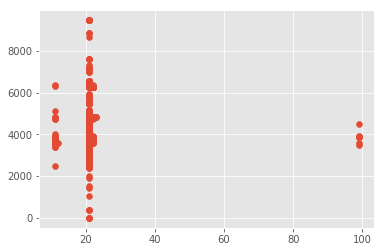

In [35]:
x = simplified2_df.Place_of_Service_Cd
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

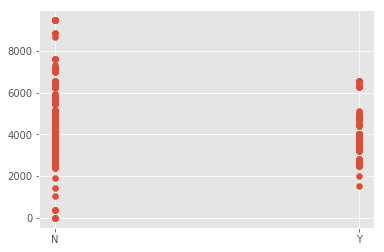

In [36]:
x = simplified2_df.Capitation_Flag
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

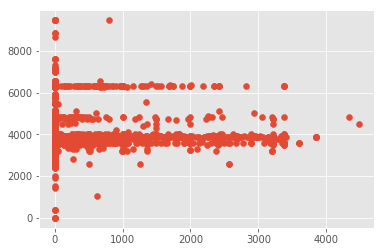

In [37]:
x = simplified2_df.Deductible_Amt
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)

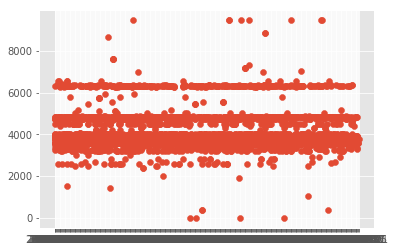

In [38]:
x = simplified2_df.Service_Start_Dt
y = simplified2_df.Charged_Amt_Total

fig, ax = plt.subplots()
ax.scatter(x, y)


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# make your data
X = simplified2_df.iloc[:, -9:-1] #iloc for taking the columns you want
y = simplified2_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [40]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(6248, 8)
(4686, 8)
(1562, 8)


In [41]:
X = simplified2_df.iloc[:, -4:] #iloc for taking the columns you want
y = simplified2_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))



Coefficients: 
 [  54.96422121 -113.44904197 -232.17587372   -2.8551021 ]
Mean squared error: 592436.30
Variance score: 0.01


In [42]:
list(zip(X.columns, regr.coef_))

[('Deductible_or_Not', 54.96422120704769),
 ('Copay_or_not', -113.4490419671942),
 ('Capitation_Flag_Binary', -232.17587371740998),
 ('is_weekend', -2.8551020999072136)]

In [43]:
X = simplified2_df.loc[:, ['Place_of_Service_Cd', 'Capitation_Flag_Binary', 'Copay_or_not', 'is_weekend', 'Prepaid_or_not']] #loc for labels
y = simplified2_df.loc[:, 'Charged_Amt_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [   0.70026806 -201.68699501  319.30189625    2.46704451 -105.99574383]
Mean squared error: 621136.07
Variance score: 0.01


In [44]:
list(zip(X.columns, regr.coef_))

[('Place_of_Service_Cd', 0.7002680583920879),
 ('Capitation_Flag_Binary', -201.68699501389113),
 ('Copay_or_not', 319.3018962534062),
 ('is_weekend', 2.4670445050108754),
 ('Prepaid_or_not', -105.9957438340354)]

Random Forest
From the Linear Regression modeling it looks like there's some correlations, however, the relationships between those correlations is complex and the predictive capabilities of the model aren't very good

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [50]:
X = simplified2_df.loc[:, ['Place_of_Service_Cd', 'Capitation_Flag_Binary', 'Copay_or_not', 'is_weekend', 'Prepaid_or_not']] #loc for labels
y = simplified2_df.loc[:, 'Charged_Amt_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create random forest object
rf = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 589632.30
Variance score: 0.02


In [51]:
X = simplified2_df.iloc[:, -4:] #iloc for taking the columns you want
y = simplified2_df.loc[:, 'Charged_Amt_Total']

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create random forest object
rf = RandomForestRegressor(n_estimators = 250, random_state = 42)

# Train the model using the training sets
rf.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = rf.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 689356.44
Variance score: 0.00


Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
X = simplified2_df.loc[:, ['Place_of_Service_Cd', 'Capitation_Flag_Binary', 'Copay_or_not', 'is_weekend', 'Prepaid_or_not']] #loc for labels
y = simplified2_df.loc[:, 'Charged_Amt_Total']
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create random forest object
gbr = GradientBoostingRegressor(n_estimators = 250, random_state = 42)

# Train the model using the training sets
gbr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = gbr.predict(X_test)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))